In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from scripts_ml.ann_utils import *

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11886205204896325385
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1449056665
locality {
  bus_id: 1
  links {
  }
}
incarnation: 175901564091023757
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [3]:
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
prefix_time_seq = 'time_2018-04-30_imp_bg_'
valid_code = '_val_24000_6000_'
postfix_time_seq_val = '_190815_645'
postfix_time_seq = '_190812_1547'
preproc_folder = "enriched_time_seq"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
indexfile = '_fold_indexes'
expname = "MLP_"+preproc_folder+valid_code.split('_val_')[1][:-1]+"_imp"

-Loading preprocessed data...
validation training files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_imp_bg__val_24000_6000__traindata_190815_645.pkl
validation testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_imp_bg__val_24000_6000__testdata_190815_645.pkl
training files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_imp_bg__traindata_190812_1547.pkl
testing files: ../data/preproc_traintest/enriched_time_seq/time_2018-04-30_imp_bg__testdata_190812_1547.pkl
Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_408 (Dense)            (None, 50)                1800      
_________________________________________________________________
dropout_292 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_409 (Dense)            (None, 20)                1020   

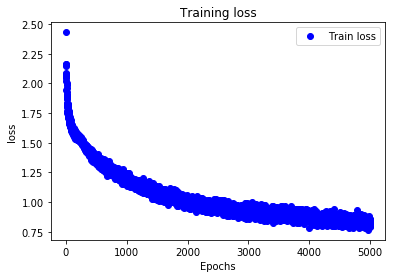

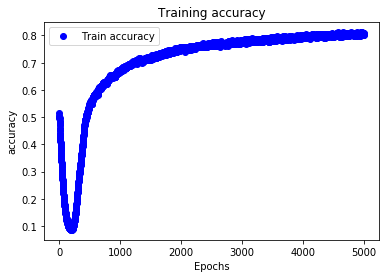

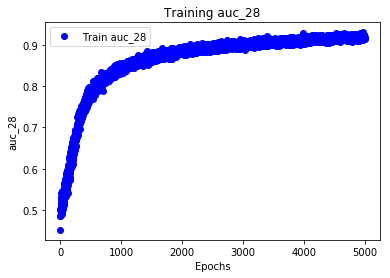

Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_416 (Dense)            (None, 50)                1800      
_________________________________________________________________
dropout_298 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_417 (Dense)            (None, 20)                1020      
_________________________________________________________________
dropout_299 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_418 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_300 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_419 (Dense)            (None, 1)              

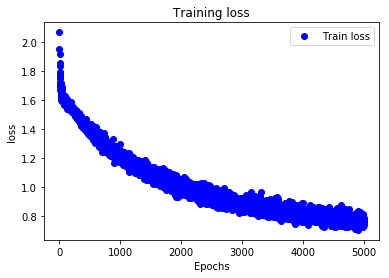

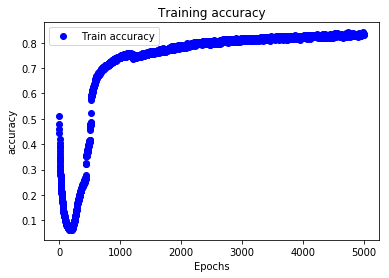

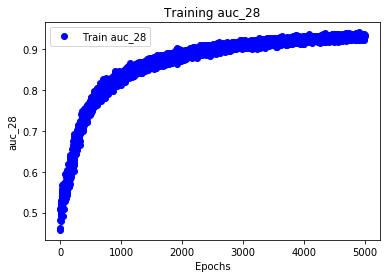

Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_420 (Dense)            (None, 50)                1800      
_________________________________________________________________
dropout_301 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_421 (Dense)            (None, 20)                1020      
_________________________________________________________________
dropout_302 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_422 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_303 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_423 (Dense)            (None, 1)              

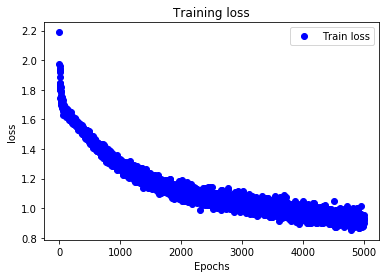

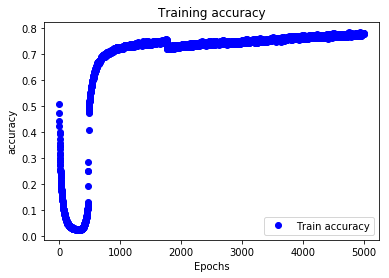

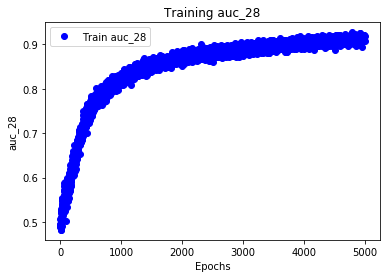

Validation AUC aggregating the results of 3 folds: 0.825626507940253

Retraining the model using the full training set for proper testing...
Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_424 (Dense)            (None, 50)                1800      
_________________________________________________________________
dropout_304 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_425 (Dense)            (None, 20)                1020      
_________________________________________________________________
dropout_305 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_426 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_306 (Dropout)        (None, 20)    

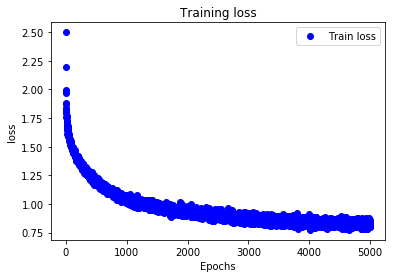

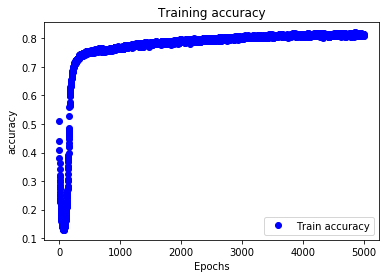

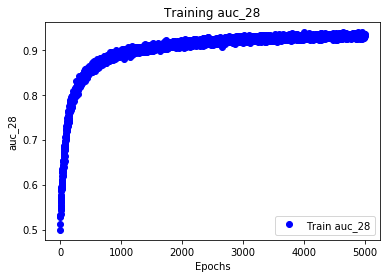

- Saving the model to ../data/models/MLP_enriched_time_seq24000_6000_imp/...
Saving model to ../data/models/MLP_enriched_time_seq24000_6000_imp/time_2018-04-30_imp_bg__sequential_116_190819_040.h5
Prediction performance on 11518 observations from test set
Confusion matrix: 
[[0.88997 0.11003]
 [0.01713 0.02683]]
AUC 0.763
Confusion matrix:
[[9819 1214]
 [ 189  296]]
- Activating existing experiment 'MLP_enriched_time_seq24000_6000_imp', the following results will be saved in it...
- Tracking the experiment on mlflow...
- Experiment tracked.


In [30]:
with tf.device("/device:GPU:0"):
    experiment = mlp_exp_timeseq(datafolder, prefix_time_seq, postfix_time_seq,
                    postfix_time_seq_val, valid_code, indexfile,
                             experiment_name=expname, 
                             hidden_layers_no=2,  #4
                             hidden_nodes=[50, 20],       
                             optimizer=Adam(0.0001),
                             hl_activations=[tf.nn.relu]*2,      
                             dropout=[0.6]*2,
                             loss_func = tf.keras.losses.BinaryCrossentropy(),
                             metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                             to_monitor=('accuracy', 0.95),
                             validation_ep=True,
                             epochs=500, 
                             batch_size=1024,
                             use_batch_and_steps=False,
                             class_1_weight=25,
                             pred_threshold = 0.55,
                             verbose=0,
                             early_stopping=False, 
                             save_model=False, 
                             save_results_for_viz=False,
                             mlf_tracking=False)